In [31]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')

### Ejercicio 1:
Se seleccionaron muestras de cinco observaciones de cada una de tres poblaciones. Los datos obtenidos se han almacenado en el archivo **ANOVA_1**.

a. Calcula la estimación entre tratamientos de σ²  
b. Calcula la estimación dentro de los tratamientos de σ²  
c. Con un nivel de significancia α = 0.05, ¿podemos rechazar la hipótesis nula de que las medias de las tres poblaciones son iguales?  
d. Construye la tabla ANOVA para este problema  

a. Estimación entre tratamientos de σ²: 285.00
b. Estimación dentro de tratamientos de σ²: 5.50
c. ¿Rechazar H₀ (α=0.05)? Sí (p=0.0000)

d. Tabla ANOVA:
                df  sum_sq  mean_sq          F    PR(>F)
C(Poblacion)   2.0   570.0    285.0  51.818182  0.000001
Residual      12.0    66.0      5.5        NaN       NaN


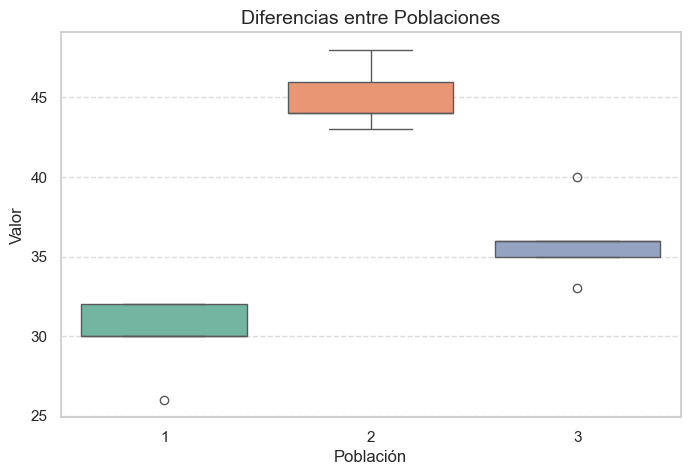

In [45]:
# Cargar datos
data = pd.read_excel('ANOVA_1.xls', header=None, skiprows=1, names=['Valor', 'Poblacion'])
data['Poblacion'] = data['Poblacion'].astype('category')

# Análisis ANOVA
model = ols('Valor ~ C(Poblacion)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=1)

# a. Estimación entre tratamientos
print(f"a. Estimación entre tratamientos de σ²: {anova_table['mean_sq'][0]:.2f}")

# b. Estimación dentro de tratamientos
print(f"b. Estimación dentro de tratamientos de σ²: {anova_table['mean_sq'][1]:.2f}")

# c. Prueba de hipótesis
alpha = 0.05
p_value = anova_table['PR(>F)'][0]
print(f"c. ¿Rechazar H₀ (α={alpha})? {'Sí' if p_value < alpha else 'No'} (p={p_value:.4f})")

# d. Tabla ANOVA
print("\nd. Tabla ANOVA:")
print(anova_table)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Poblacion', y='Valor', data=data, palette='Set2')
plt.title('Diferencias entre Poblaciones', fontsize=14)
plt.xlabel('Población', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

### Ejercicio 2:
Los datos en **ANOVA_2** muestran el tiempo (en minutos) necesario para mezclar un lote de material por tres fabricantes diferentes. Usando α = 0.05:

a. ¿Existen diferencias significativas en los tiempos medios entre los fabricantes?

b. Realiza comparaciones por pares si es necesario

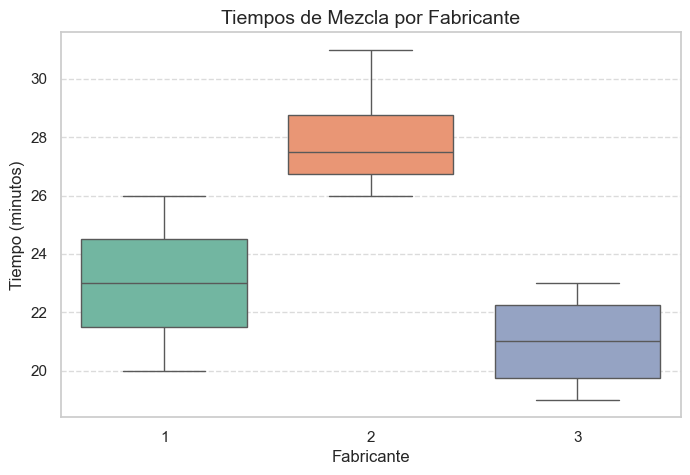

=== Resultados ANOVA ===
F = 10.64, p-valor = 0.0043
Conclusión: Diferencias significativas

=== Comparaciones por pares (Tukey HSD) ===
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2      5.0 0.0266   0.6348  9.3652   True
     1      3     -2.0 0.4406  -6.3652  2.3652  False
     2      3     -7.0 0.0039 -11.3652 -2.6348   True
-----------------------------------------------------


In [49]:
# 1. Cargar datos
data = pd.read_excel('ANOVA_2.xls', header=None, skiprows=1, names=['Tiempo', 'Fabricante'])
data['Fabricante'] = data['Fabricante'].astype('category')

# 2. ANOVA
model = ols('Tiempo ~ C(Fabricante)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# 3. Gráfico
plt.figure(figsize=(8,5))
sns.boxplot(x='Fabricante', y='Tiempo', data=data, palette='Set2')
plt.title('Tiempos de Mezcla por Fabricante', fontsize=14)
plt.xlabel('Fabricante', fontsize=12)
plt.ylabel('Tiempo (minutos)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Resultados
print("=== Resultados ANOVA ===")
print(f"F = {anova_table['F'][0]:.2f}, p-valor = {anova_table['PR(>F)'][0]:.4f}")
print("Conclusión:", "Diferencias significativas" if anova_table['PR(>F)'][0] < 0.05 else "No hay diferencias significativas")

# 5. Comparaciones post-hoc si ANOVA es significativa
if anova_table['PR(>F)'][0] < 0.05:
    print("\n=== Comparaciones por pares (Tukey HSD) ===")
    tukey = pairwise_tukeyhsd(data['Tiempo'], data['Fabricante'], alpha=0.05)
    print(tukey.summary())

### Ejercicio 3:
Retomando los datos del Ejercicio 1 (ANOVA_1.xls) donde se rechazó H₀:

a. Usando el procedimiento LSD de Fisher, comprueba si hay diferencias significativas entre:
   - Población 1 vs 2
   - Población 1 vs 3  
   - Población 2 vs 3

b. Desarrolla un intervalo de confianza del 95% para la diferencia entre las medias de las poblaciones 1 y 2

=== a. Comparaciones LSD de Fisher ===

Población 1 vs 2:
Diferencia de medias: -15.00
LSD crítico: 3.23
Conclusión: Diferencia significativa

Población 1 vs 3:
Diferencia de medias: -6.00
LSD crítico: 3.23
Conclusión: Diferencia significativa

Población 2 vs 3:
Diferencia de medias: 9.00
LSD crítico: 3.23
Conclusión: Diferencia significativa

=== b. IC 95% para Población 1 vs 2 ===
Diferencia de medias: -15.00
Intervalo de confianza 95%: (-18.23, -11.77)


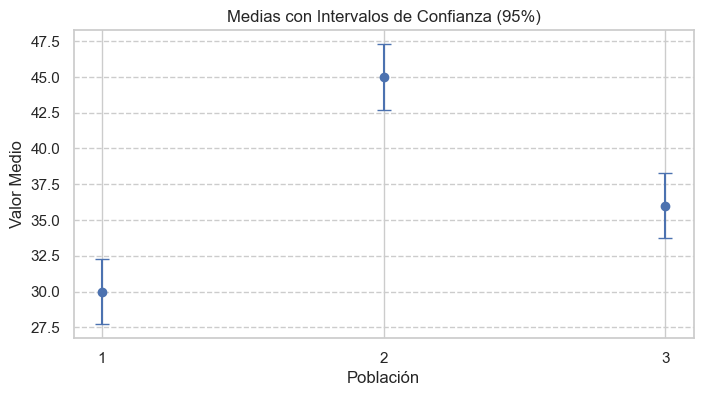

In [56]:
# 1. Cargar datos del Ejercicio 1
data = pd.read_excel('ANOVA_1.xls', header=None, skiprows=1, names=['Valor', 'Poblacion'])
data['Poblacion'] = data['Poblacion'].astype('category')

# 2. Calcular estadísticos necesarios
n_groups = data['Poblacion'].nunique()
n_obs = len(data)
grand_mean = data['Valor'].mean()
ss_total = sum((data['Valor'] - grand_mean)**2)

# 3. Realizar ANOVA para obtener MSE
model = ols('Valor ~ C(Poblacion)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
mse = anova_table['mean_sq'][1]  # Varianza dentro de grupos

# 4. a. Comparaciones LSD de Fisher
print("=== a. Comparaciones LSD de Fisher ===")
group_means = data.groupby('Poblacion')['Valor'].mean()
group_counts = data.groupby('Poblacion')['Valor'].count()

# Calcular LSD para α=0.05
t_value = stats.t.ppf(1-0.05/2, n_obs - n_groups)  # Valor crítico t
lsd = t_value * np.sqrt(2 * mse / (n_obs/n_groups))  # Fórmula LSD

comparisons = [(1,2), (1,3), (2,3)]
for (g1, g2) in comparisons:
    diff = group_means[g1] - group_means[g2]
    print(f"\nPoblación {g1} vs {g2}:")
    print(f"Diferencia de medias: {diff:.2f}")
    print(f"LSD crítico: {lsd:.2f}")
    print("Conclusión:", "Diferencia significativa" if abs(diff) > lsd else "No significativa")

# 4. b. Intervalo de confianza del 95% para Población 1 vs 2
print("\n=== b. IC 95% para Población 1 vs 2 ===")
diff = group_means[1] - group_means[2]
se = np.sqrt(mse * (1/group_counts[1] + 1/group_counts[2]))  # Error estándar
margin = t_value * se  # Margen de error

print(f"Diferencia de medias: {diff:.2f}")
print(f"Intervalo de confianza 95%: ({diff - margin:.2f}, {diff + margin:.2f})")

# 5. Visualización de comparaciones
plt.figure(figsize=(8,4))
plt.errorbar(x=[1,2,3], 
             y=group_means, 
             yerr=t_value*np.sqrt(mse/group_counts),
             fmt='o', 
             capsize=5)
plt.title('Medias con Intervalos de Confianza (95%)')
plt.xlabel('Población')
plt.ylabel('Valor Medio')
plt.xticks([1,2,3])
plt.grid(axis='y', linestyle='--')
plt.show()

=== Resultados ===
a. Comparación LSD entre Fabricante 1 y 3:
- Diferencia de medias: 2.00 minutos
- LSD crítico (α=0.05): 3.54
- Conclusión: No hay diferencia significativa

b. Interpretación:
No hay evidencia suficiente (α=0.05) para afirmar que los tiempos difieren entre Fabricante 1 (23.0 min) y 3 (21.0 min)


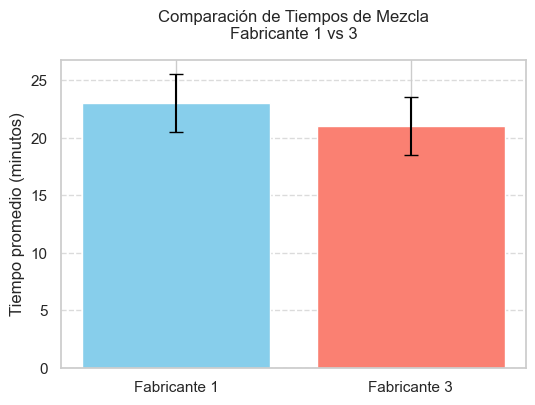

In [58]:
# 1. Cargar datos del Ejercicio 2
data = pd.read_excel('ANOVA_2.xls', header=None, skiprows=1, names=['Tiempo', 'Fabricante'])
data['Fabricante'] = data['Fabricante'].astype('category')

# 2. Calcular estadísticos necesarios
n_groups = data['Fabricante'].nunique()
n_obs = len(data)
group_means = data.groupby('Fabricante')['Tiempo'].mean()
group_counts = data.groupby('Fabricante')['Tiempo'].count()

# 3. Obtener MSE del ANOVA
model = ols('Tiempo ~ C(Fabricante)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
mse = anova_table['mean_sq'][1]  # Varianza dentro de grupos

# 4. a. Comparación LSD Fisher para Fabricantes 1 vs 3
alpha = 0.05
t_value = stats.t.ppf(1-alpha/2, n_obs - n_groups)  # Valor crítico t
lsd = t_value * np.sqrt(mse * (1/group_counts[1] + 1/group_counts[3]))

diff = group_means[1] - group_means[3]
abs_diff = abs(diff)

print("=== Resultados ===")
print(f"a. Comparación LSD entre Fabricante 1 y 3:")
print(f"- Diferencia de medias: {diff:.2f} minutos")
print(f"- LSD crítico (α={alpha}): {lsd:.2f}")
print("- Conclusión:", "Diferencia significativa" if abs_diff > lsd else "No hay diferencia significativa")

# 4. b. Conclusión específica
print("\nb. Interpretación:")
if abs_diff > lsd:
    print(f"Existe evidencia estadística (α=0.05) de que el Fabricante 1 ({group_means[1]:.1f} min) y 3 ({group_means[3]:.1f} min) tienen tiempos de mezcla significativamente diferentes")
else:
    print(f"No hay evidencia suficiente (α=0.05) para afirmar que los tiempos difieren entre Fabricante 1 ({group_means[1]:.1f} min) y 3 ({group_means[3]:.1f} min)")

# 5. Gráfico de comparación específica
plt.figure(figsize=(6,4))
plt.bar(['Fabricante 1', 'Fabricante 3'], 
        [group_means[1], group_means[3]], 
        color=['skyblue', 'salmon'])
plt.errorbar(['Fabricante 1', 'Fabricante 3'],
             [group_means[1], group_means[3]],
             yerr=t_value*np.sqrt(mse/group_counts[[1,3]]),
             fmt='none', 
             capsize=5,
             color='black')
plt.title('Comparación de Tiempos de Mezcla\nFabricante 1 vs 3', pad=15)
plt.ylabel('Tiempo promedio (minutos)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Ejercicio 5:
Continuando con los datos del Ejercicio 2 (ANOVA_2.xls):

Usando el procedimiento LSD de Fisher, desarrolla un intervalo de confianza del 95% para la diferencia entre los tiempos medios de los fabricantes 1 y 2

=== Intervalo de Confianza LSD al 95% ===
Diferencia de medias (F1 - F2): -5.00 minutos
Error estándar: 1.56
Margen de error: ±3.54
Intervalo de Confianza: (-8.54, -1.46)


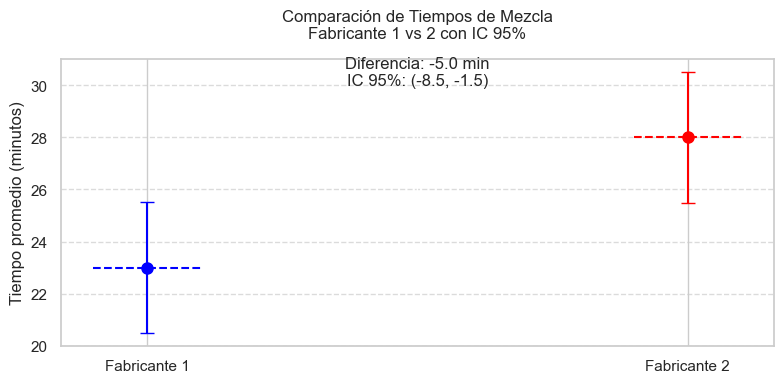

In [64]:
# 1. Cargar datos
data = pd.read_excel('ANOVA_2.xls', header=None, skiprows=1, names=['Tiempo', 'Fabricante'])
data['Fabricante'] = data['Fabricante'].astype('category')

# 2. Calcular estadísticos básicos
group_means = data.groupby('Fabricante')['Tiempo'].mean()
group_counts = data.groupby('Fabricante')['Tiempo'].count()

# 3. Obtener MSE del modelo ANOVA
model = ols('Tiempo ~ C(Fabricante)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
mse = anova_table['mean_sq'][1]  # Mean Square Error

# 4. Calcular intervalo de confianza LSD al 95%
alpha = 0.05
n_obs = len(data)
n_groups = data['Fabricante'].nunique()
diff = group_means[1] - group_means[2]
t_critical = stats.t.ppf(1 - alpha/2, n_obs - n_groups)  # Valor crítico t
se = np.sqrt(mse * (1/group_counts[1] + 1/group_counts[2]))  # Error estándar
margin = t_critical * se  # Margen de error

print("=== Intervalo de Confianza LSD al 95% ===")
print(f"Diferencia de medias (F1 - F2): {diff:.2f} minutos")
print(f"Error estándar: {se:.2f}")
print(f"Margen de error: ±{margin:.2f}")
print(f"Intervalo de Confianza: ({diff - margin:.2f}, {diff + margin:.2f})")

# 5. Visualización corregida
plt.figure(figsize=(8, 4))

# Graficar cada punto por separado con su color
plt.errorbar(x=0, y=group_means[1], 
             yerr=t_critical*np.sqrt(mse/group_counts[1]),
             fmt='o', markersize=8, capsize=5, color='blue')
plt.errorbar(x=1, y=group_means[2], 
             yerr=t_critical*np.sqrt(mse/group_counts[2]),
             fmt='o', markersize=8, capsize=5, color='red')

# Líneas horizontales
plt.hlines(y=group_means[1], xmin=-0.1, xmax=0.1, colors='blue', linestyles='dashed')
plt.hlines(y=group_means[2], xmin=0.9, xmax=1.1, colors='red', linestyles='dashed')

# Configuración del gráfico
plt.title('Comparación de Tiempos de Mezcla\nFabricante 1 vs 2 con IC 95%', pad=15)
plt.ylabel('Tiempo promedio (minutos)')
plt.xticks([0, 1], ['Fabricante 1', 'Fabricante 2'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Anotación de diferencia
plt.annotate(f'Diferencia: {diff:.1f} min\nIC 95%: ({diff - margin:.1f}, {diff + margin:.1f})',
             xy=(0.5, (group_means[1] + group_means[2])/2),
             xytext=(0.5, max(group_means) + 2),
             arrowprops=dict(arrowstyle='->'),
             ha='center')

plt.tight_layout()
plt.show()